In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss 
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("../data/processed/csv/input.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

<BarContainer object of 16 artists>

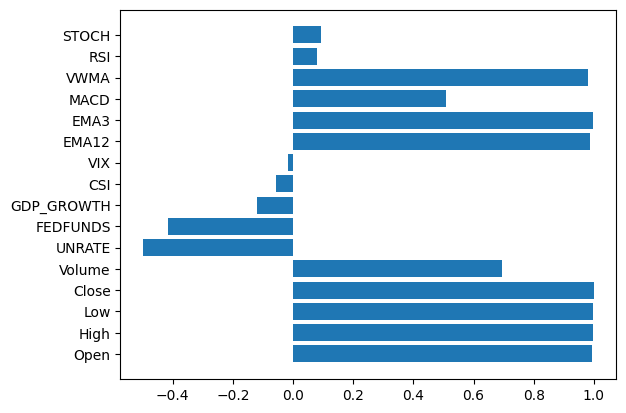

In [2]:
correlations = data.drop(columns='Adj Close').corrwith(data['Adj Close'], method='spearman')
plt.barh(y=correlations.index, width=correlations.values)

<Axes: >

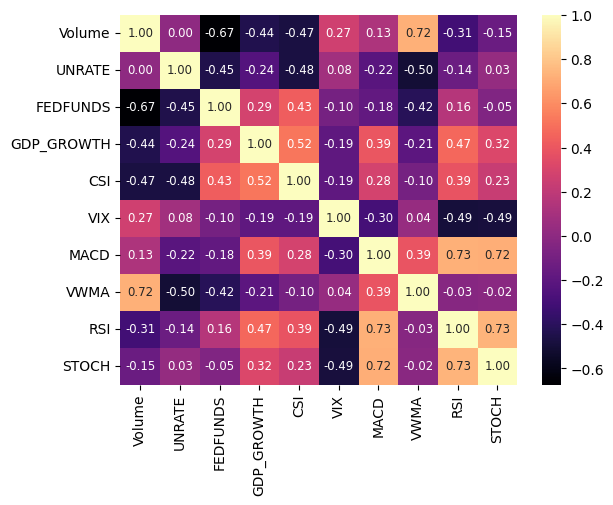

In [3]:
correlations = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close','EMA3', 'EMA12']).corr(method='spearman')
sns.heatmap(correlations,cmap='magma', fmt='.2f', annot=True, annot_kws={'fontsize':'small'})

In [4]:
l = len(data.columns)
tests = pd.DataFrame({'adf test p-value':np.zeros(l), 'kpss test p-value': np.zeros(l), 'shapiro test p-value': np.zeros(l),'is stationary':np.empty(l, dtype=str), 'is normal': np.empty(l, dtype=str)}, index=data.columns)

In [5]:
for col in data.columns:
    adf = adfuller(data[col].values)[1]
    kps = kpss(data[col].values)[1]
    shapiro_test = shapiro(data[col].values).pvalue
    tests.loc[col, 'adf test p-value'] = adf 
    tests.loc[col, 'kpss test p-value'] = kps
    tests.loc[col, 'shapiro test p-value'] = shapiro_test
    if adf <= 0.05 or kps >= 0.05:
        tests.loc[col, 'is stationary'] = 'yes'
    else: tests.loc[col, 'is stationary'] = 'no'
    if shapiro_test > 0.05:
        tests.loc[col, 'is normal'] = 'yes'
    else: tests.loc[col, 'is normal'] = 'no'
        

tests.to_csv('files/stationarity_test.csv')
tests

adf test p-value  kpss test p-value  shapiro test p-value  \
Open                0.995714           0.010000          1.574066e-18   
High                0.997503           0.010000          9.148066e-19   
Low                 0.997423           0.010000          2.003597e-18   
Close               0.998517           0.010000          1.368110e-18   
Adj Close           0.998517           0.010000          1.368110e-18   
Volume              0.619943           0.010000          4.400965e-13   
UNRATE              0.021782           0.100000          9.048384e-15   
FEDFUNDS            0.036170           0.010000          1.004133e-17   
GDP_GROWTH          0.007708           0.094749          1.773340e-16   
CSI                 0.391182           0.018641          3.436805e-06   
VIX                 0.000009           0.100000          3.322707e-19   
EMA12               0.998826           0.010000          1.143649e-18   
EMA3                0.997785           0.010000          1.338324e-18   
MACD                0.002423           0.021855          1.082859e-14   
VWMA                0.997802           0.010000          1.842352e-18   
RSI                 0.001825           0.100000          5.217634e-07   
STOCH               0.009430           0.100000          1.056440e-18   

           is stationary is normal  
Open                  no        no  
High                  no        no  
Low                   no        no  
Close                 no        no  
Adj Close             no        no  
Volume                no        no  
UNRATE               yes        no  
FEDFUNDS             yes        no  
GDP_GROWTH           yes        no  
CSI                   no        no  
VIX                  yes        no  
EMA12                 no        no  
EMA3                  no        no  
MACD                 yes        no  
VWMA                  no        no  
RSI                  yes        no  
STOCH                yes        no